# step 1:
load the libraries into the jupyter notebook

In [25]:
import sklearn.datasets as dataset
import pandas as pd
import seaborn as sns
import  matplotlib.pyplot as plt

In [14]:
from sklearn.tree import DecisionTreeClassifier

# step 2:
load the dataset into pandas dataframe

In [15]:
iris = dataset.load_iris()

In [18]:
df = pd.DataFrame(iris.data,columns=iris.feature_names)

In [19]:
print(df.head(3))

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2


In [29]:
y = iris.target

# step 3:
exploratory data analysis

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [21]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


<Figure size 576x432 with 0 Axes>

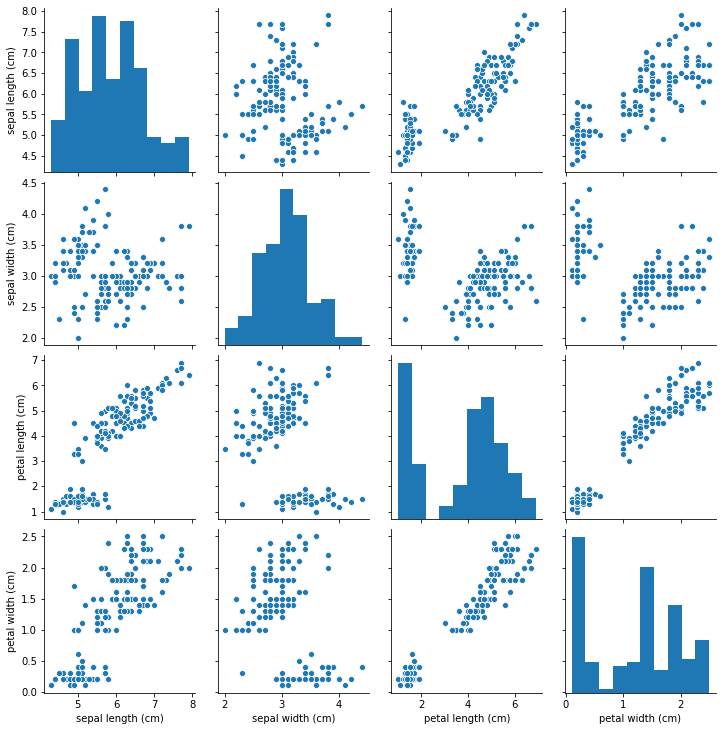

In [28]:
plt.figure(figsize=(8,6))
sns.pairplot(df)

# step 4:
build the model

In [30]:
dtree =  DecisionTreeClassifier()

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
x_train,x_test,y_train,y_test = train_test_split(df,y,test_size=0.3,random_state=0)

In [33]:
print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)

(105, 4) (45, 4)
(105,) (45,)


In [34]:
dtree.fit(x_train,y_train)

DecisionTreeClassifier()

In [37]:
predicted = dtree.predict(x_test)

# step 5:
evaluating the model using classification matrix

In [36]:
from sklearn.metrics import accuracy_score,classification_report

In [38]:
print(accuracy_score(predicted,y_test))

0.9777777777777777


In [40]:
print(classification_report(predicted,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.94      1.00      0.97        17
           2       1.00      0.92      0.96        12

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.98        45
weighted avg       0.98      0.98      0.98        45



# step 6:
plotting the decision tree

In [45]:
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
from sklearn.externals.six import 

In [46]:
from six import StringIO

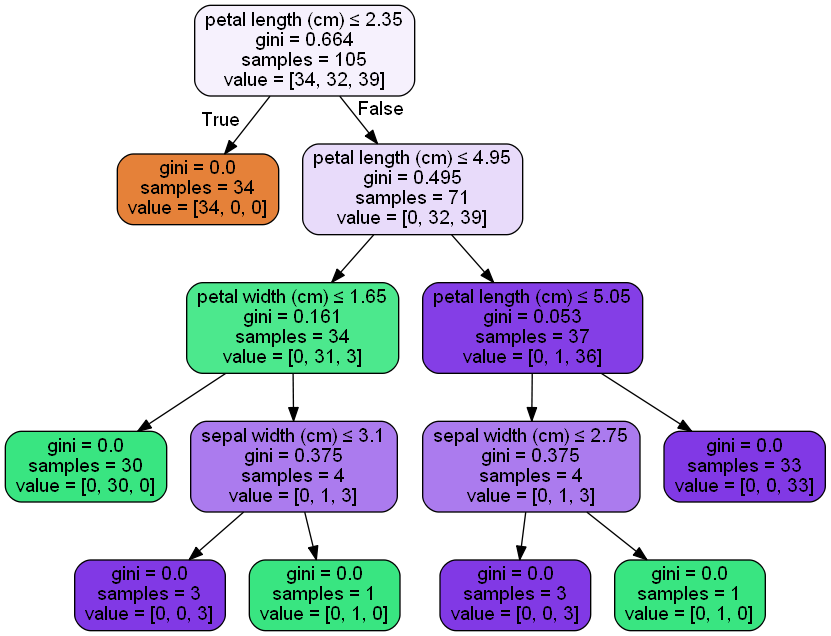

<Figure size 432x216 with 0 Axes>

In [49]:
plt.figure(figsize=(6,3))
dot_data = StringIO()
export_graphviz(dtree,out_file=dot_data,feature_names=iris.feature_names,rounded=True,special_characters=True,filled=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())